<a href="https://colab.research.google.com/github/Shubh3005/NittanyAIMLB/blob/main/MLB_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from torchvision import datasets
from torchvision.transforms import ToTensor


In [18]:
train_data = datasets.MNIST (
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
    )

test_data = datasets.MNIST (
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
    )

In [19]:
from torch.utils.data import DataLoader
loaders = {
    'train': DataLoader(train_data, batch_size = 100, shuffle = True, num_workers = 1),
    'test': DataLoader(test_data, batch_size = 100, shuffle = True, num_workers = 1)
}

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self) -> None:
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1,10,kernel_size=5)
        self.conv2 = nn.Conv2d(10,20,kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self,x):
        x = F.relu(F.max_pool2d (self.conv1(x),2))
        x = F.relu(F.max_pool2d (self.conv2_drop(self.conv2(x)),2))
        x = x.view(-1,320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)

        return F.softmax(x)

In [21]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#initialize the model
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data,target) in enumerate(loaders["train"]):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(f'Train Epoch: {epoch} [{ batch_idx * len(data)} / {len(loaders["train"].dataset)} ({100.0 * batch_idx / len(loaders["train"]):.0f}%)] \t {loss.item():.6f}')
def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in loaders["test"]:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim = 1, keepdim = True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /=len(loaders["test"].dataset)
    print(f'\n Test Set: Average loss {test_loss:.4f}, Accuracy {correct}/{len(loaders["test"].dataset)} ({100.0 * correct/ len(loaders["test"].dataset):.0f}%)\n')


In [22]:
for epoch in range(1,11):
        train(epoch)
        test()

<ipython-input-20-b262f64bbd3f>:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0 / 60000 (0%)] 	 2.301908
Train Epoch: 1 [2000 / 60000 (3%)] 	 2.287820
Train Epoch: 1 [4000 / 60000 (7%)] 	 2.194406
Train Epoch: 1 [6000 / 60000 (10%)] 	 2.062861
Train Epoch: 1 [8000 / 60000 (13%)] 	 1.945808
Train Epoch: 1 [10000 / 60000 (17%)] 	 1.898057
Train Epoch: 1 [12000 / 60000 (20%)] 	 1.883085
Train Epoch: 1 [14000 / 60000 (23%)] 	 1.780444
Train Epoch: 1 [16000 / 60000 (27%)] 	 1.846073
Train Epoch: 1 [18000 / 60000 (30%)] 	 1.774056
Train Epoch: 1 [20000 / 60000 (33%)] 	 1.678575
Train Epoch: 1 [22000 / 60000 (37%)] 	 1.743589
Train Epoch: 1 [24000 / 60000 (40%)] 	 1.673509
Train Epoch: 1 [26000 / 60000 (43%)] 	 1.654640
Train Epoch: 1 [28000 / 60000 (47%)] 	 1.665771
Train Epoch: 1 [30000 / 60000 (50%)] 	 1.702941
Train Epoch: 1 [32000 / 60000 (53%)] 	 1.660556
Train Epoch: 1 [34000 / 60000 (57%)] 	 1.683702
Train Epoch: 1 [36000 / 60000 (60%)] 	 1.635221
Train Epoch: 1 [38000 / 60000 (63%)] 	 1.592213
Train Epoch: 1 [40000 / 60000 (67%)] 	 1.629961
Tra

Prediction: 7


<ipython-input-20-b262f64bbd3f>:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


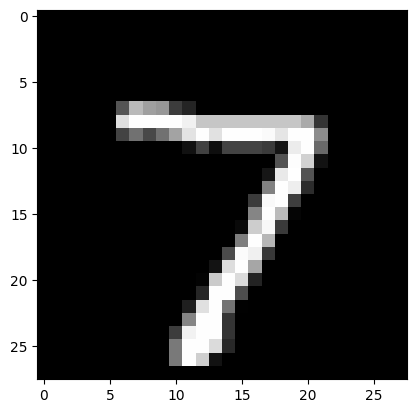

Prediction: 2


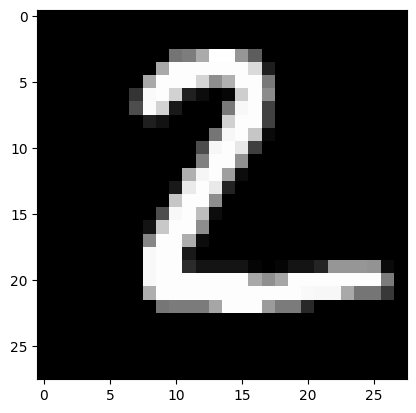

Prediction: 1


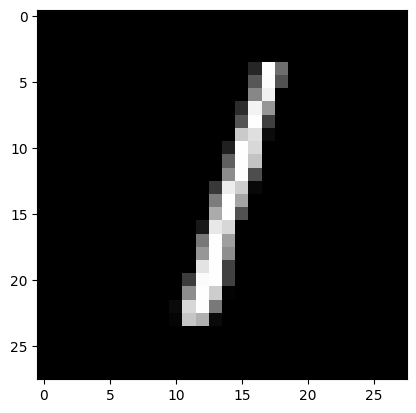

Prediction: 0


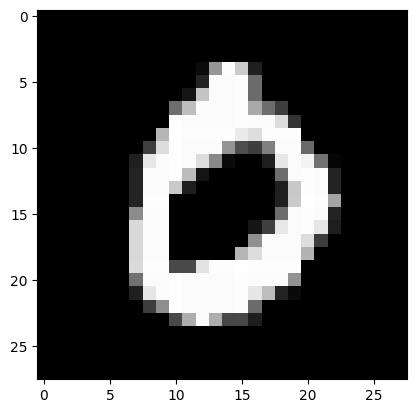

Prediction: 4


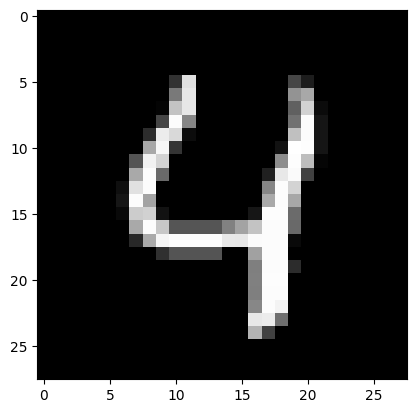

Prediction: 1


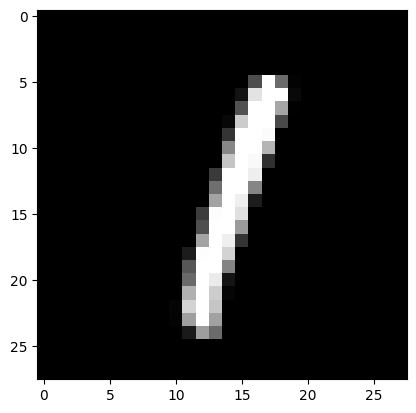

Prediction: 4


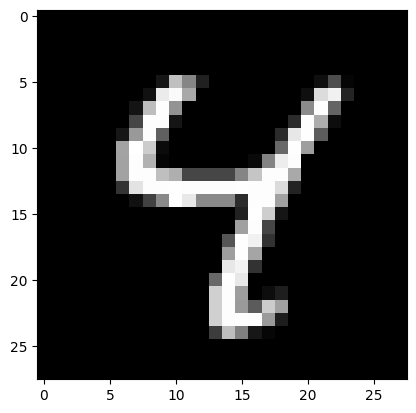

Prediction: 9


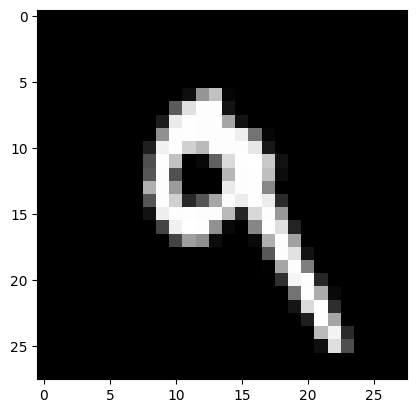

Prediction: 5


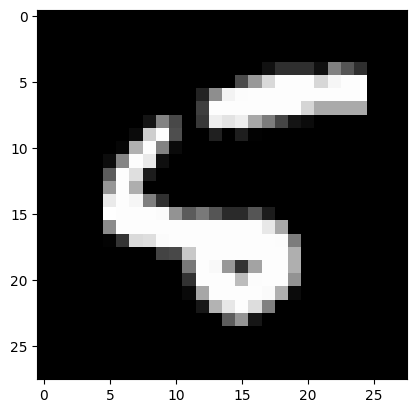

Prediction: 9


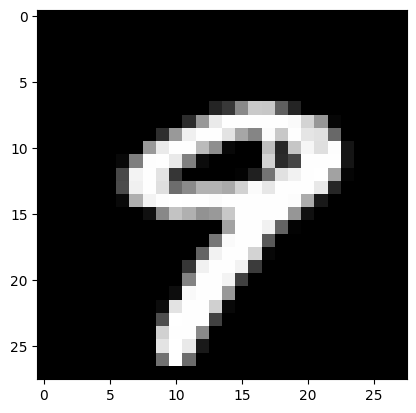

Prediction: 0


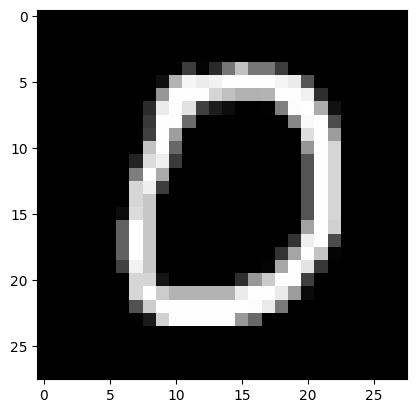

Prediction: 6


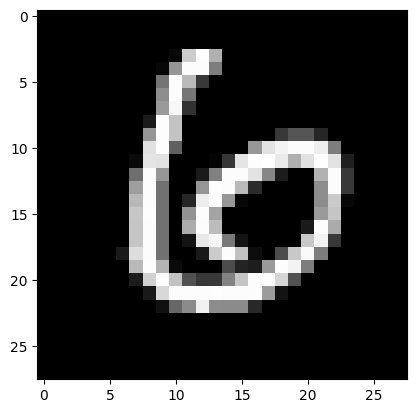

Prediction: 9


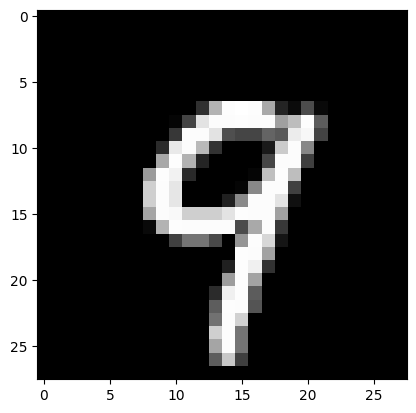

Prediction: 0


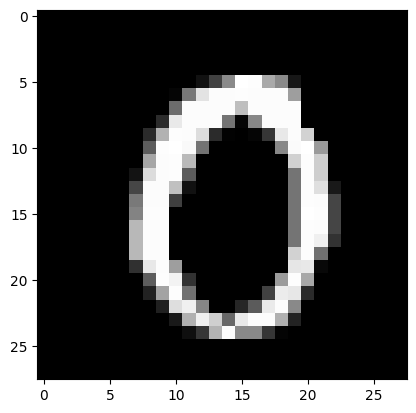

Prediction: 1


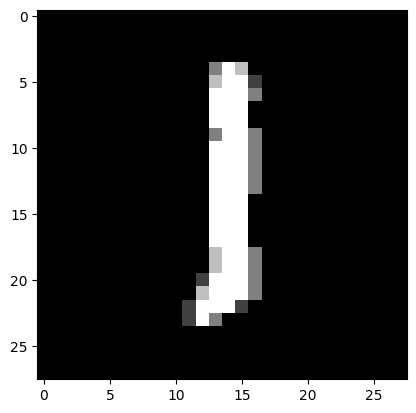

Prediction: 5


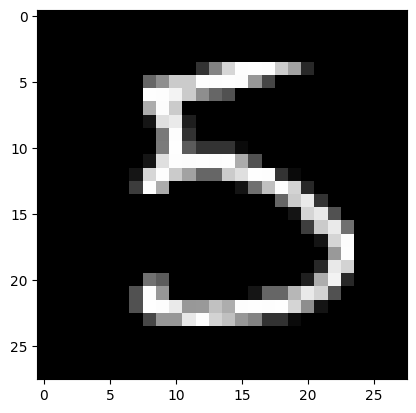

Prediction: 9


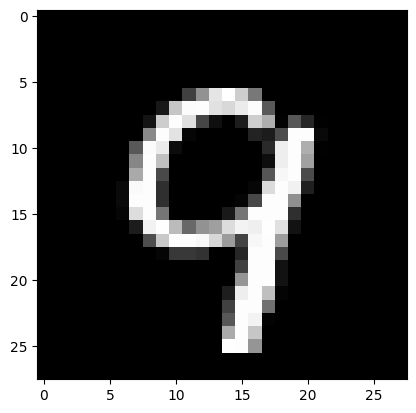

Prediction: 7


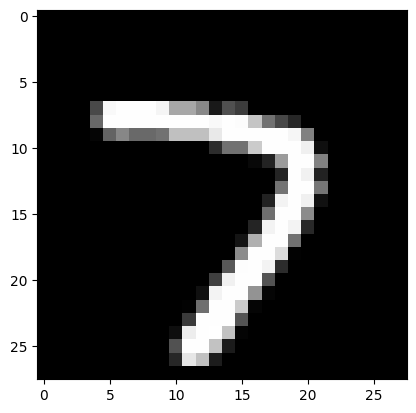

Prediction: 3


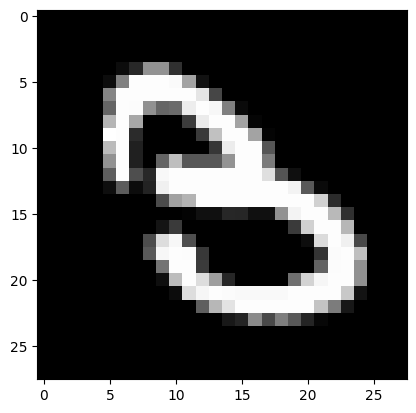

Prediction: 4


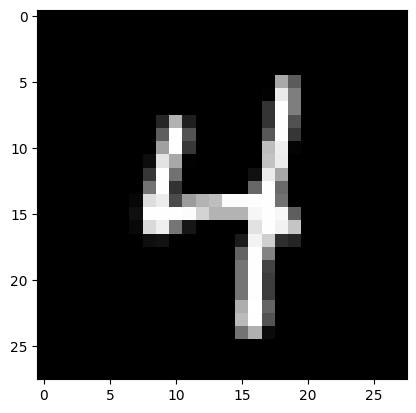

Prediction: 9


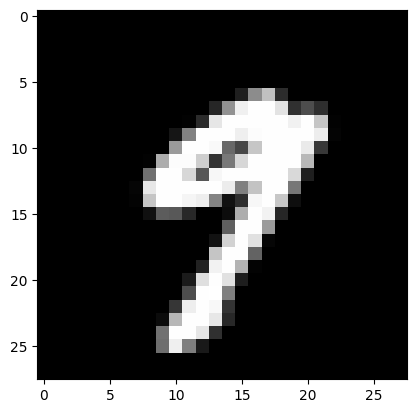

Prediction: 6


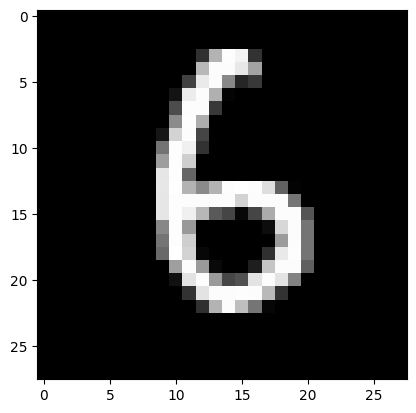

Prediction: 6


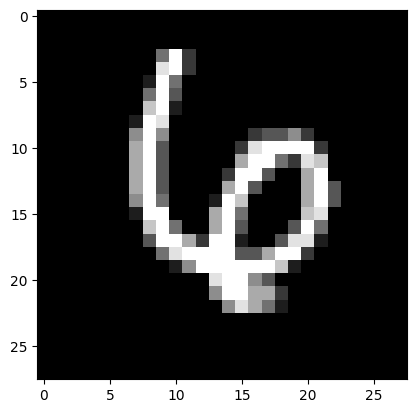

Prediction: 5


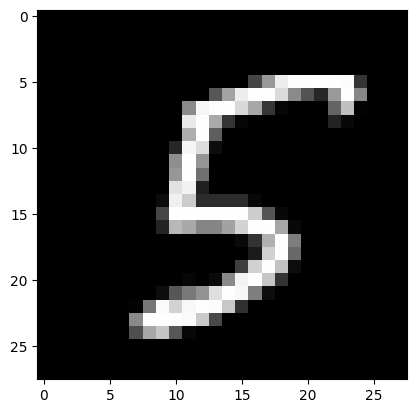

Prediction: 4


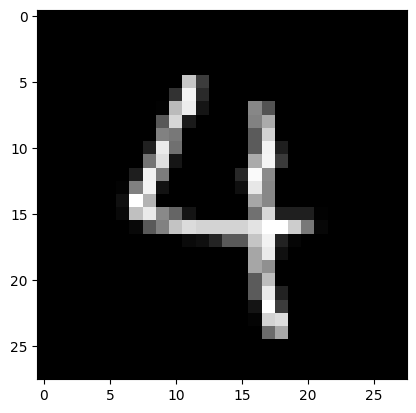

Prediction: 0


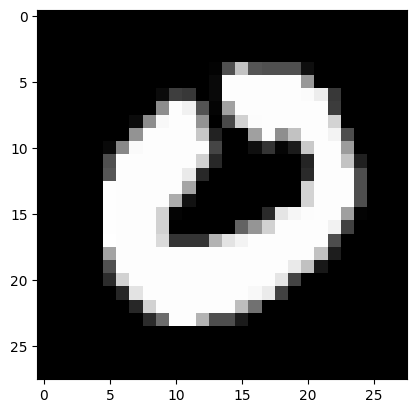

Prediction: 7


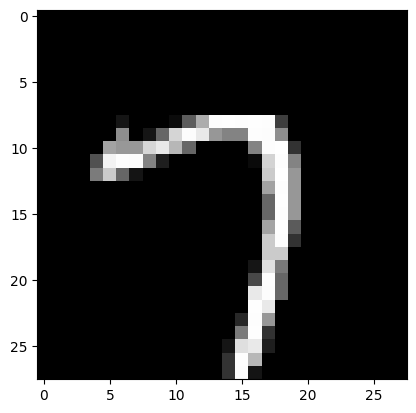

Prediction: 4


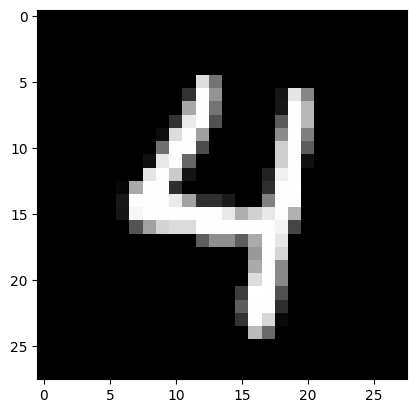

Prediction: 0


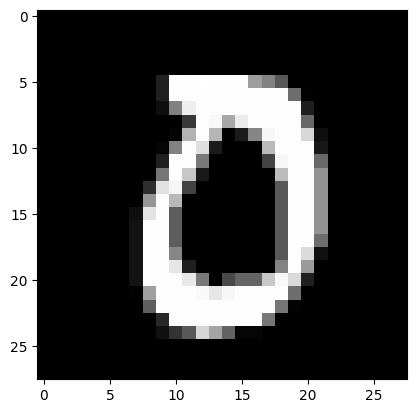

Prediction: 1


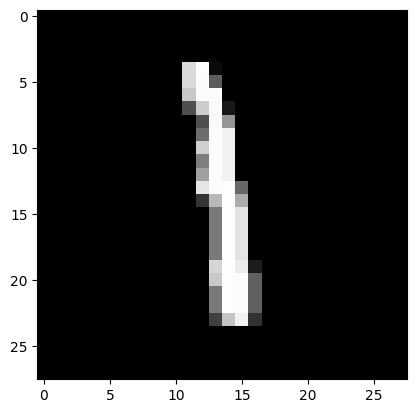

Prediction: 3


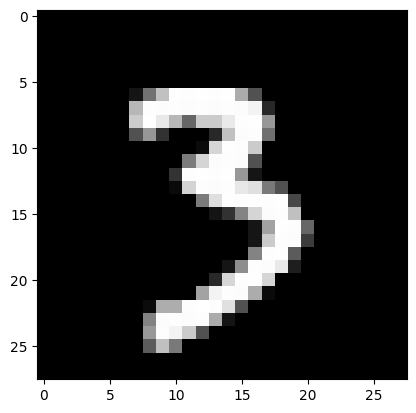

Prediction: 1


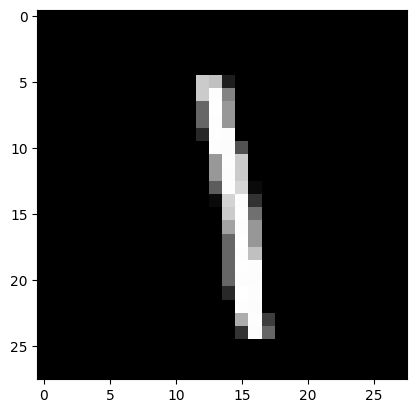

Prediction: 3


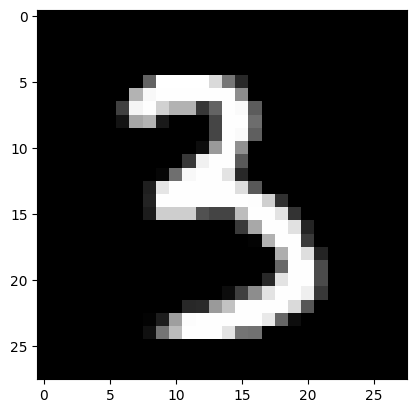

Prediction: 4


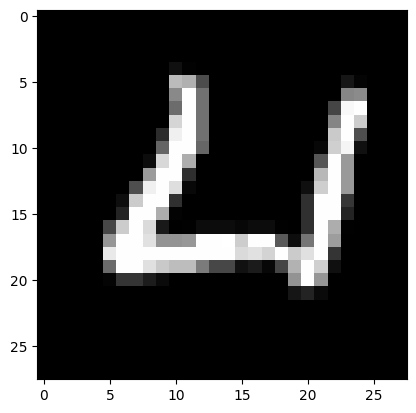

Prediction: 7


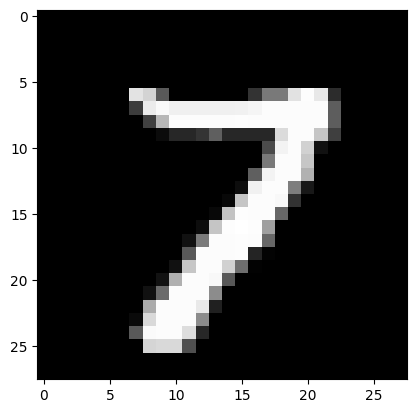

Prediction: 2


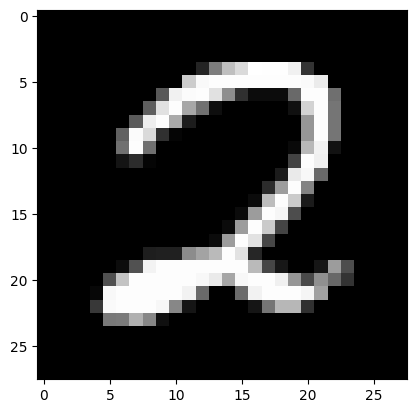

Prediction: 7


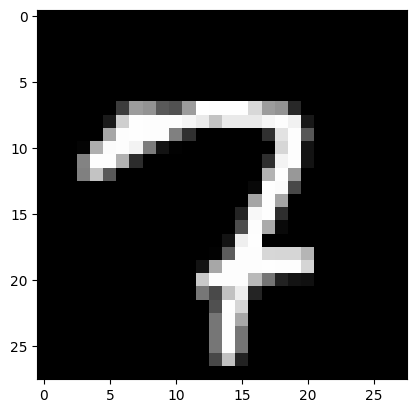

Prediction: 1


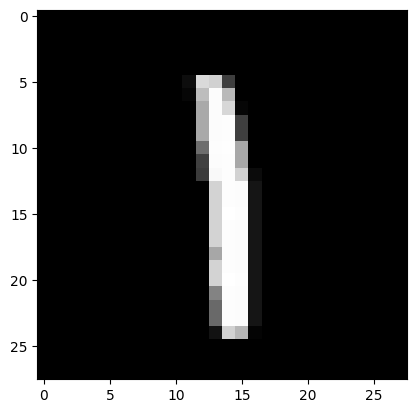

Prediction: 2


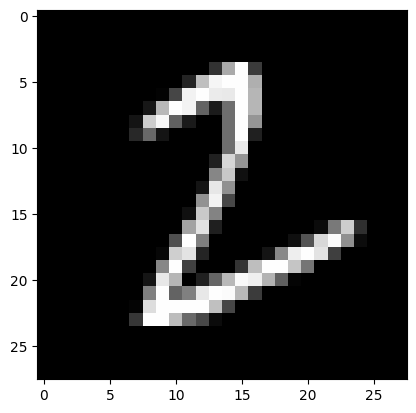

Prediction: 1


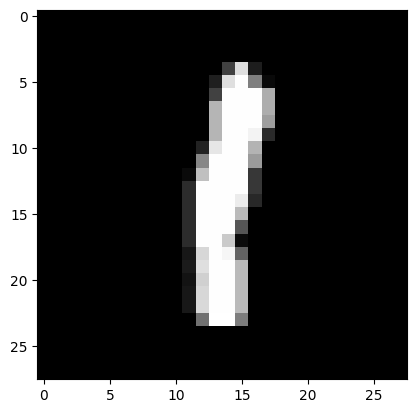

Prediction: 1


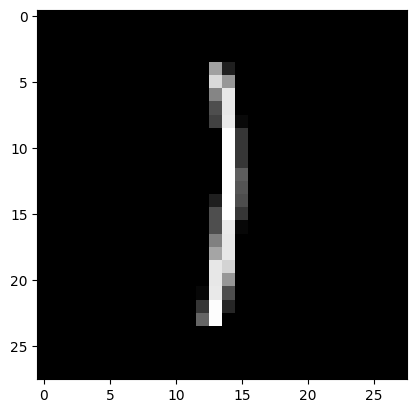

Prediction: 7


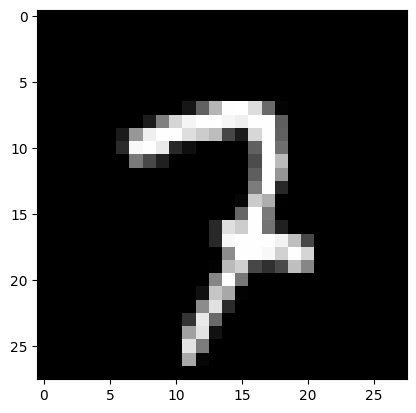

Prediction: 4


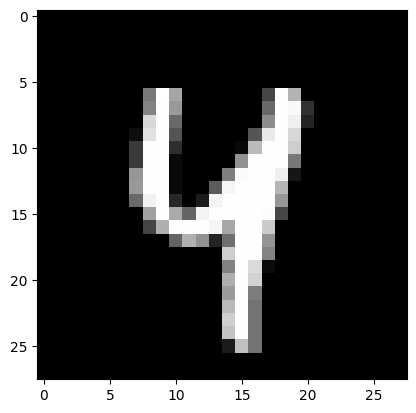

Prediction: 2


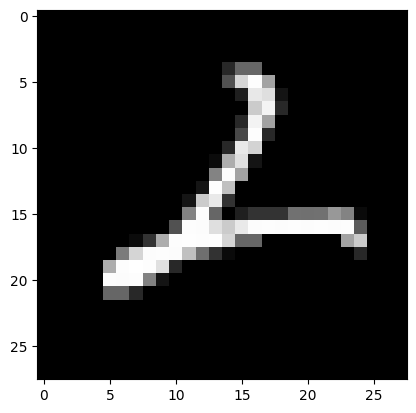

Prediction: 3


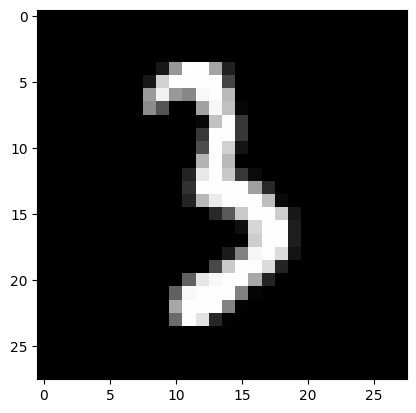

Prediction: 5


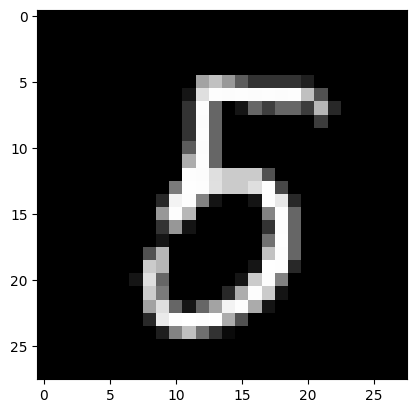

Prediction: 1


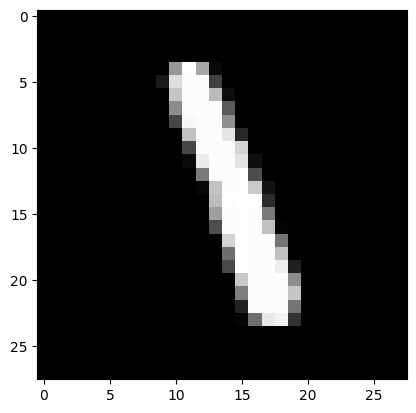

Prediction: 2


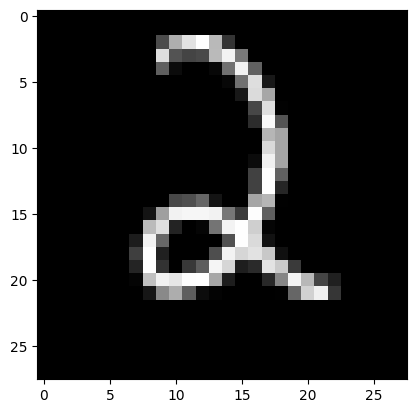

Prediction: 4


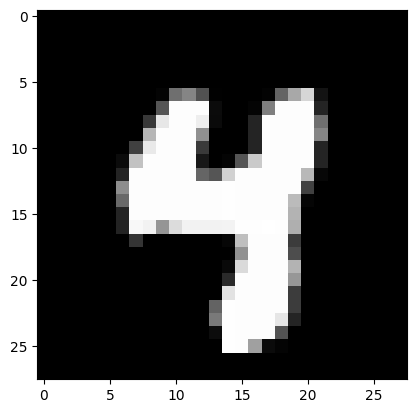

Prediction: 4


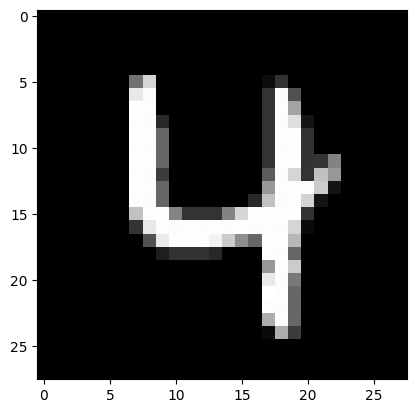

Prediction: 6


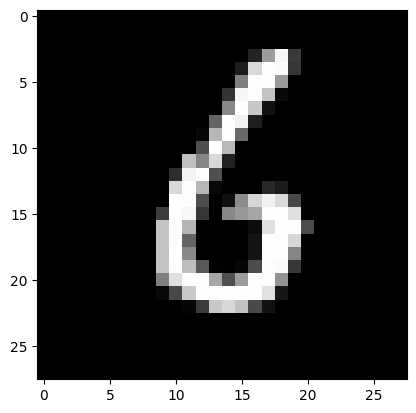

Prediction: 3


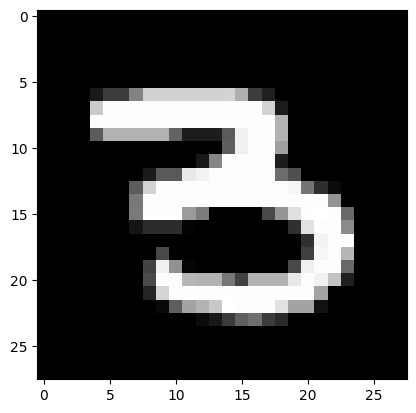

Prediction: 5


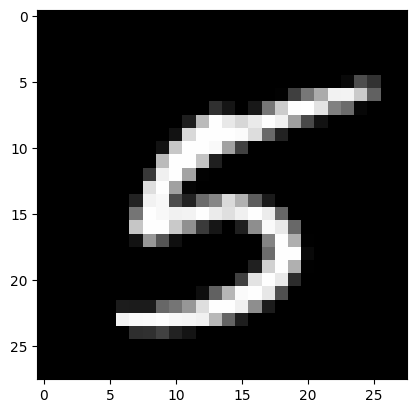

Prediction: 5


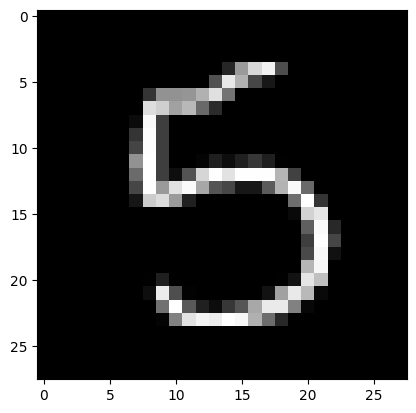

Prediction: 6


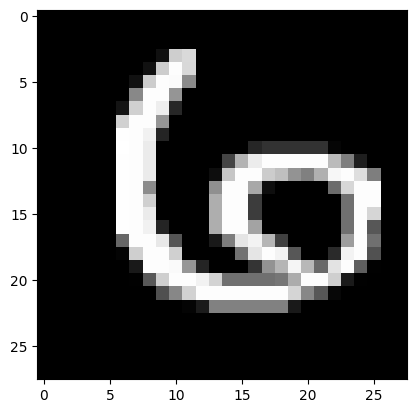

Prediction: 0


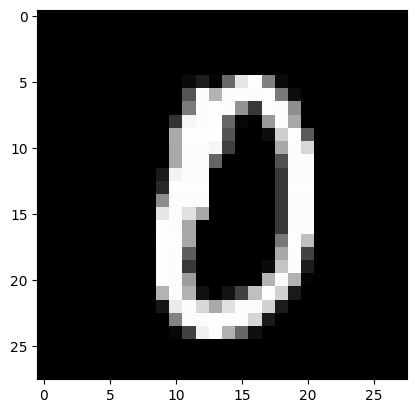

Prediction: 4


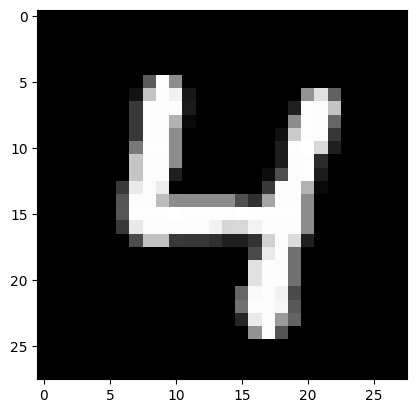

Prediction: 1


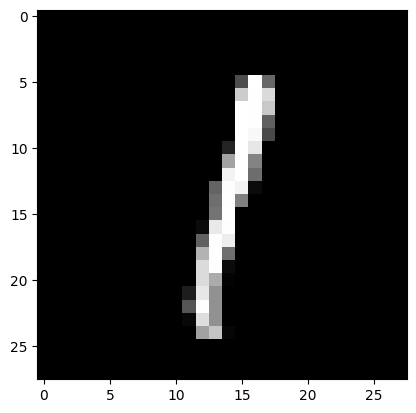

Prediction: 9


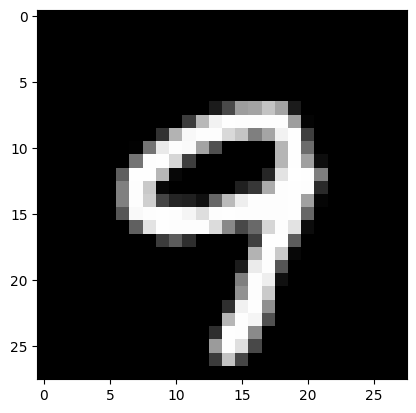

Prediction: 5


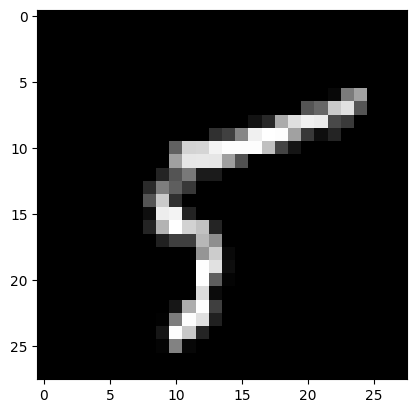

Prediction: 7


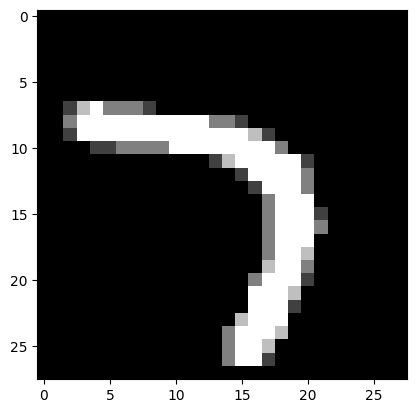

Prediction: 8


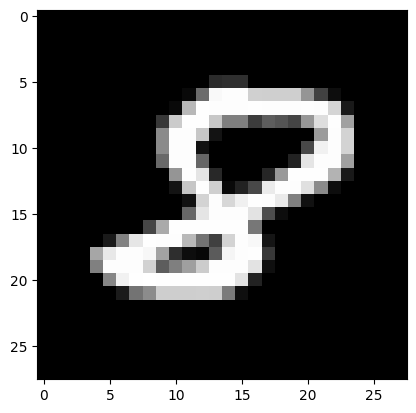

Prediction: 5


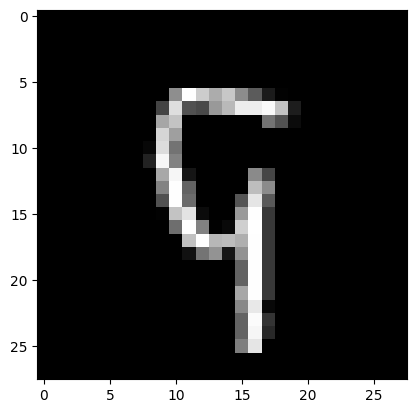

Prediction: 3


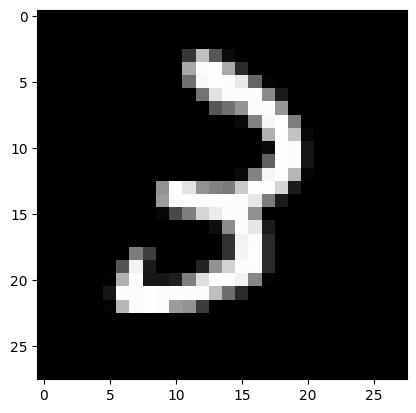

Prediction: 7


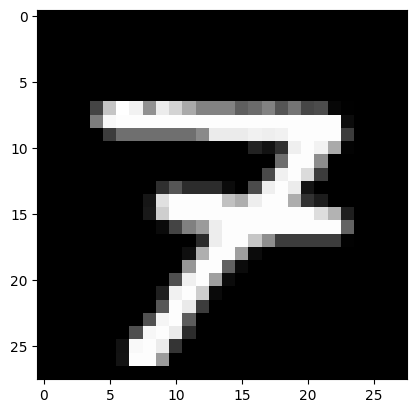

Prediction: 4


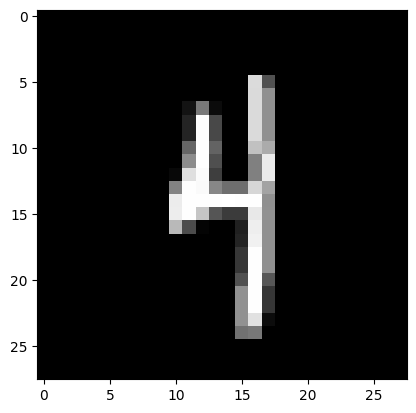

Prediction: 6


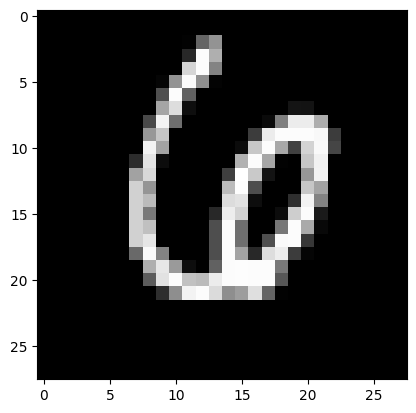

Prediction: 4


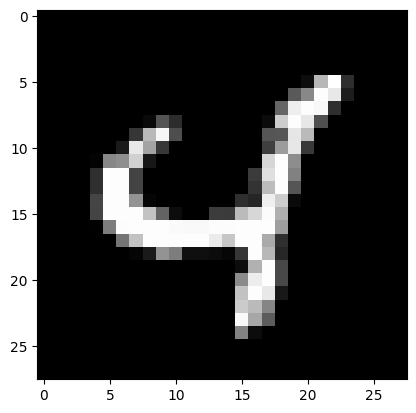

Prediction: 3


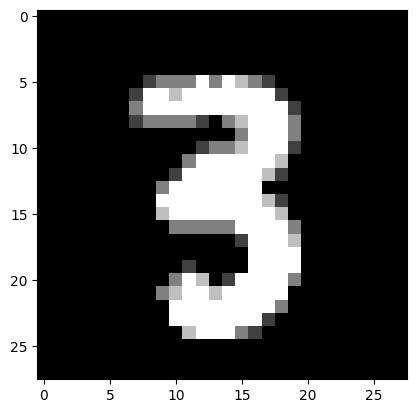

Prediction: 0


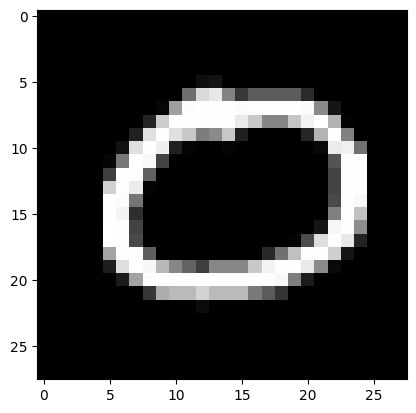

Prediction: 7


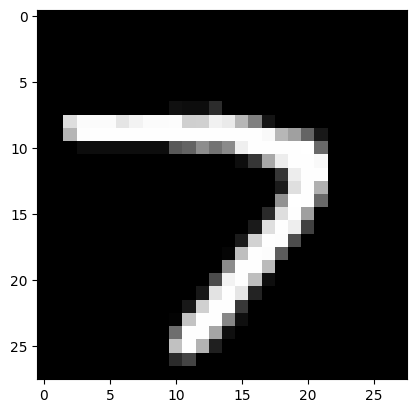

Prediction: 0


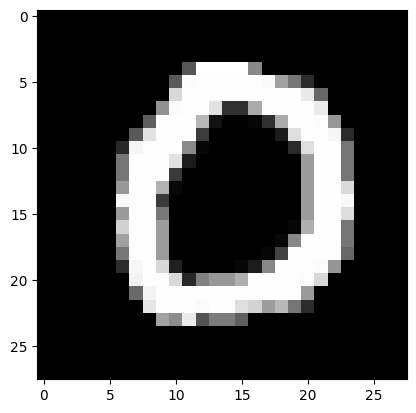

Prediction: 2


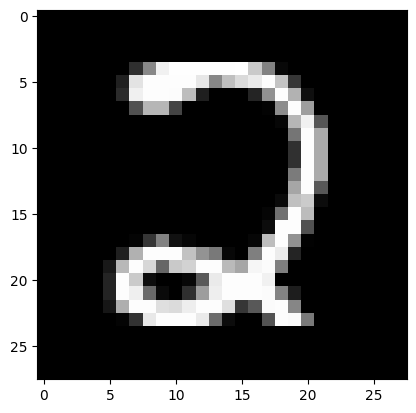

Prediction: 9


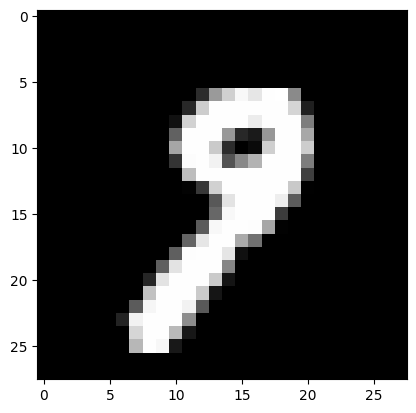

Prediction: 1


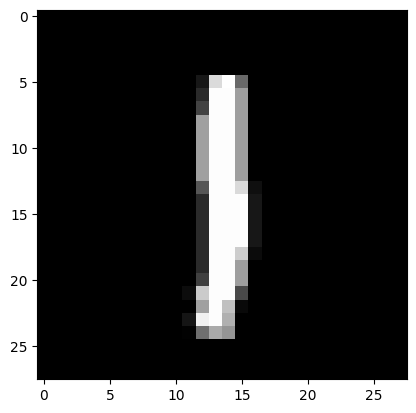

Prediction: 7


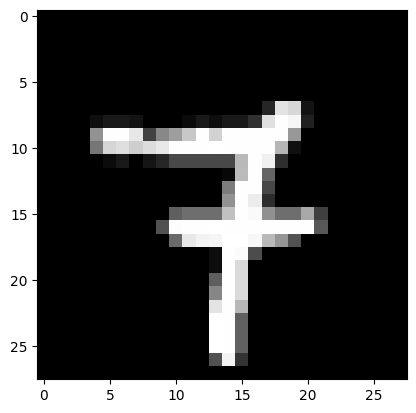

Prediction: 3


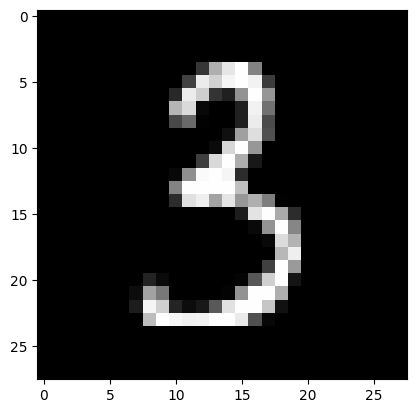

Prediction: 2


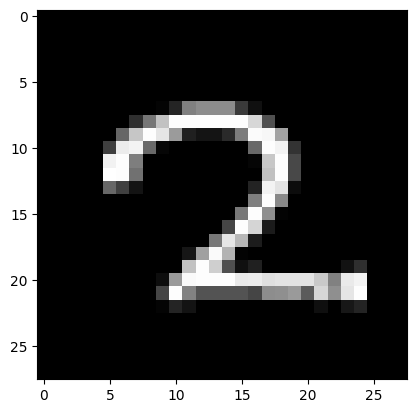

Prediction: 9


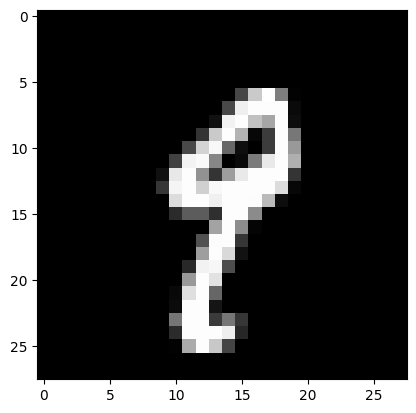

Prediction: 7


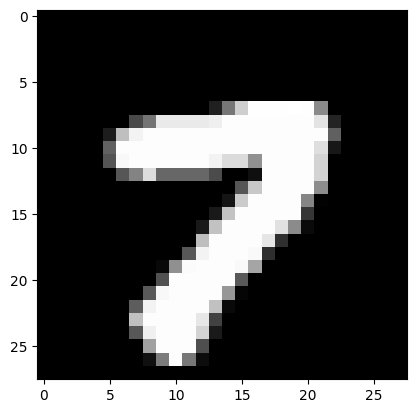

Prediction: 7


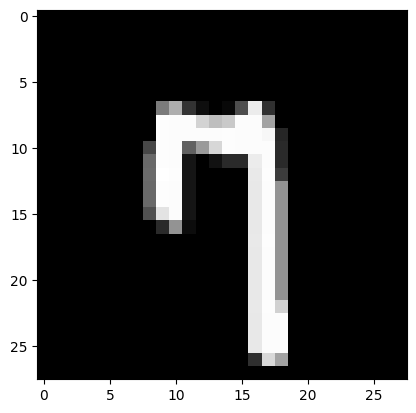

Prediction: 6


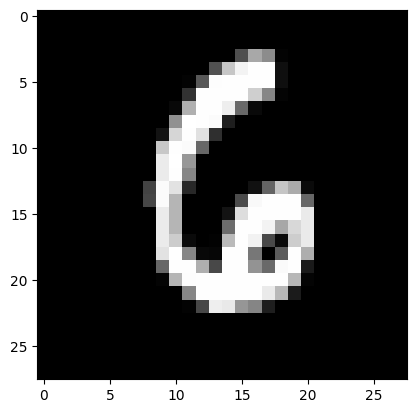

Prediction: 2


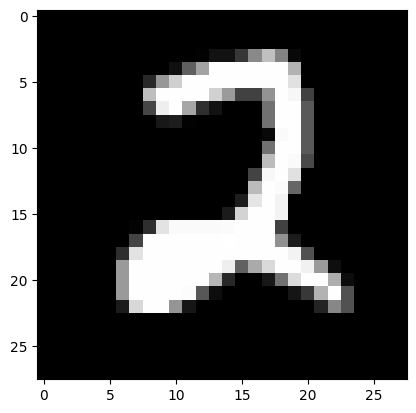

Prediction: 7


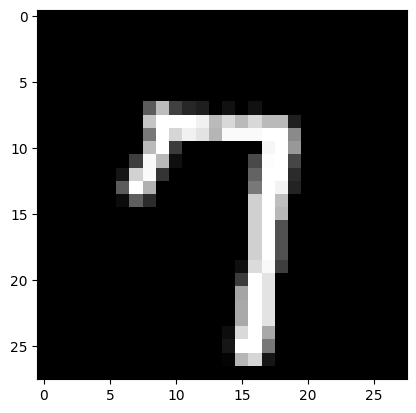

Prediction: 8


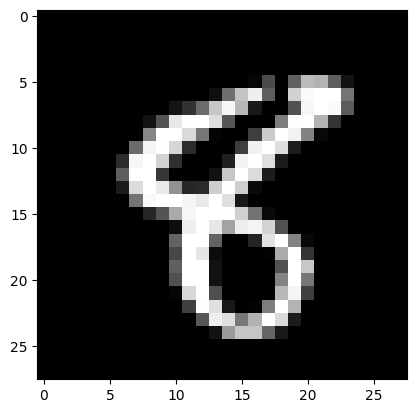

Prediction: 4


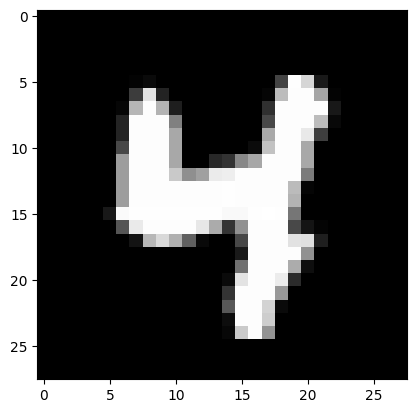

Prediction: 7


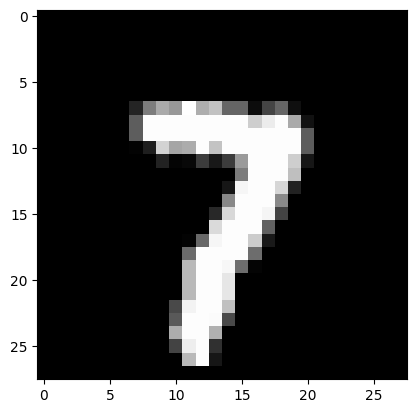

Prediction: 3


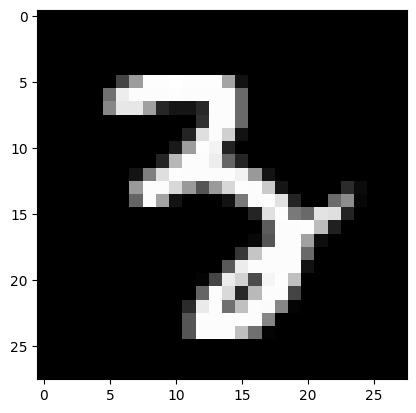

Prediction: 6


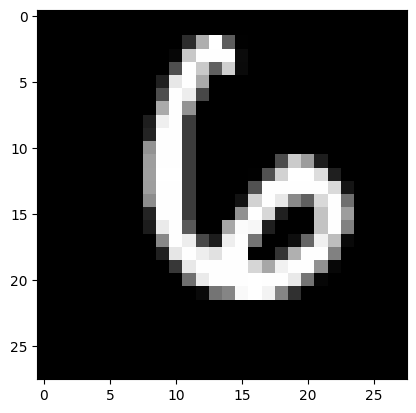

Prediction: 1


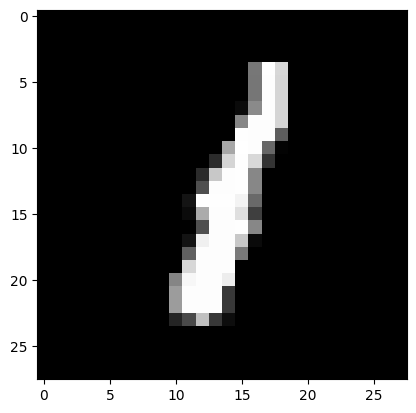

Prediction: 3


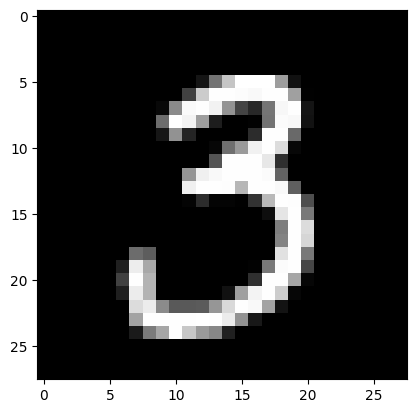

Prediction: 6


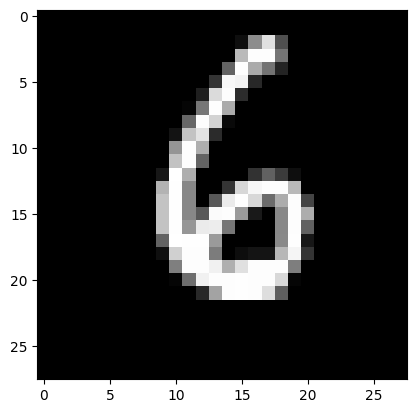

Prediction: 9


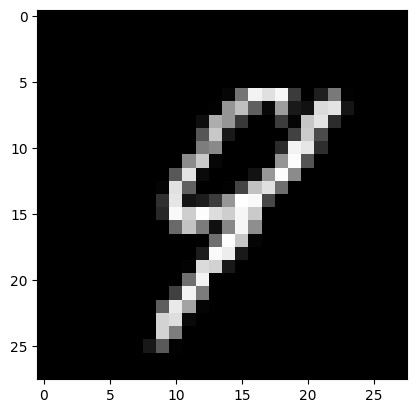

Prediction: 3


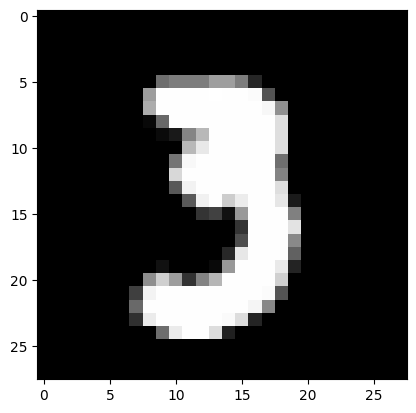

Prediction: 1


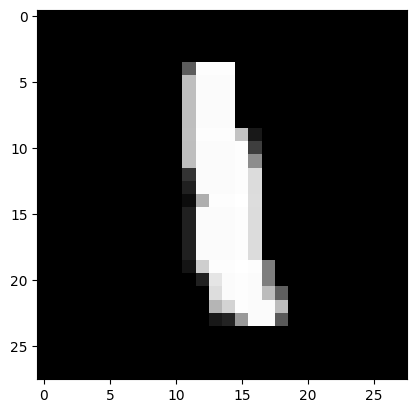

Prediction: 4


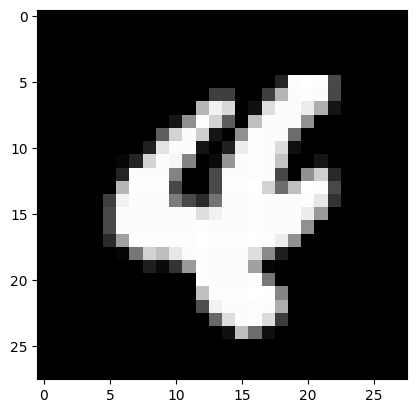

Prediction: 1


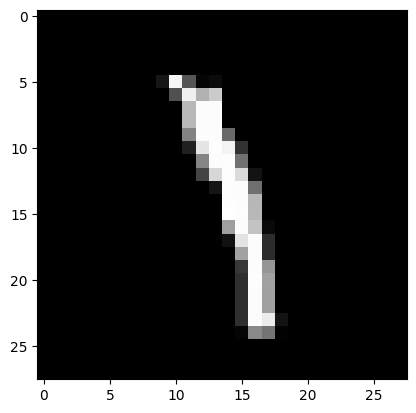

Prediction: 7


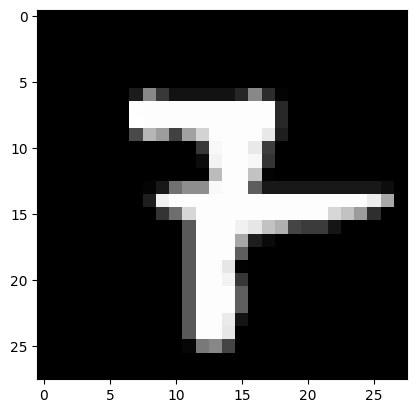

Prediction: 6


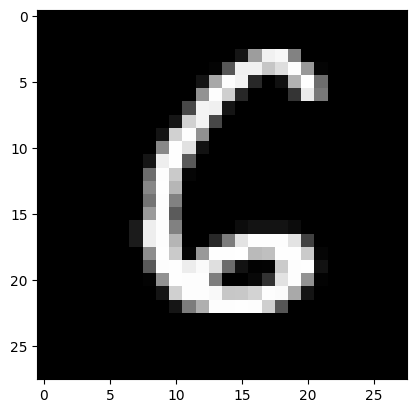

Prediction: 9


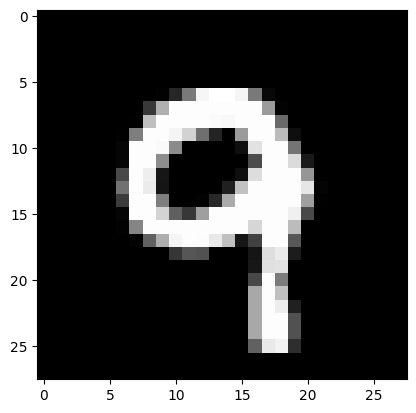

In [36]:
import matplotlib.pyplot as plt
model.eval()
for i in range (0, 100):
    data, target = test_data[i]

    data = data.unsqueeze(0).to(device)

    output = model(data)
    prediction = output.argmax(dim=1, keepdim = True).item()
    print(f"Prediction: {prediction}")

    image = data.squeeze(0).squeeze(0).cpu().numpy()
    plt.imshow(image, cmap="gray")
    plt.show()